## A nb for testing and viewing the effeciveness of unet models predictions 

This nb contains: 
- a way to crop and save images based on the mask
- a viewer to see images 
-  

In [32]:
#imports and prep

import cv2
import os

##---------file handling utils---------------------
def getPath(file):
    '''uses a path string to get just the directoy of a file'''
    strOut = ''
    i = 1
    while file[-i] != '/':
        i = i + 1
        #print(file[-i])
    strOut = file[0:len(file)-(i-1)]
    return strOut

def getName(file):
    '''uses a path string to get the name of a file'''
    strOut = ''
    i = 1
    while file[-i] != '/':
        i = i + 1
        #print(file[-i])
    strOut = file[-(i-1):]
    return strOut

### 1. Masking images based on predicted masks

In [114]:
#---------img operations-------------------------------

def crop_by_mask(image,mask,output_path):
    """
    takes in an image, and a corresponding binary mask and saves new file of image 
    values only on pixels where mask was positive. 

    Parameters:
    image (str): a string of path to image.
    mask (str): a string og path to mask 

    Returns:
    saves file to image_path/image_name.paint_only.png
    """
    img = cv2.imread(image)
    mask = cv2.imread(mask)
    output_path = output_path
    image_name = os.path.basename(image)

    # Convert the image to grayscale
    gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

    # Apply a threshold to create a binary image
    ret, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # Find contours in the mask
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) == 0:
        print("No contours found in the mask.")
        return

    # Find the bounding box of the largest contour
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour)

    # Crop the image based on the bounding box
    #cropped_image = img[y:y+h, x:x+w]

    # Create a mask of the cropped region
    #cropped_mask = mask[y:y+h, x:x+w]

    # Apply the mask to the cropped image
    #result = cv2.bitwise_and(cropped_image, cropped_image, mask=cropped_mask)
    result = cv2.bitwise_and(img,img,mask=binary)

    # Save the result to the output path
    #cv2.imwrite(output_path+image_name[:-4]+".paint_masked.png", result)
    #cv2.imshow('crop',result)
    #cv2.waitKey(5000)
    #cv2.destroyAllWindows()
    print(f"Cropped image saved to: {output_path+image_name[:-4]}.paint_masked.png")



Example callings of crop_by_mask

In [6]:

# Example usage

image_path = "/home/lqmeyers/paintDetect/images/testing/f17x2022_06_28.mp4.track000206.frame006589.jpg"
true_mask_path = "/home/lqmeyers/paintDetect/masks/testing/f17x2022_06_28.mp4.track000206.frame006589.Paint.png"
#crop_by_mask(image_path,mask_path,output_path=getPath(image_path))

#----other test functions------
#print(os.path.basename(image_path))

f17x2022_06_28.mp4.track000206.frame006589.jpg


In [115]:
import os
#Run through a folder and save all the crops as above

image_folder = "/home/lqmeyers/paintDetect/data/images/testing/"
true_mask_folder = "/home/lqmeyers/paintDetect/data/thorax_only_masks/testing/"
pred_mask_folder = '/home/lqmeyers/paintDetect/data/thorax_only_masks/predict_2023-05-26-01:21:49/'


dir_list = os.walk(image_folder)
for root, dirs, files in dir_list:
    for f in files: 
        #print(f)
        #print(root[0:-16]+'masks/training/'+f[:-4]+'.Paint.png')
        #print(pred_mask_folder+f[:-4]+'.pred.jpg')
        crop_by_mask(root+f,pred_mask_folder+f[:-4]+'.pred.jpg',pred_mask_folder)



[ WARN:0@76820.035] global loadsave.cpp:244 findDecoder imread_('/home/lqmeyers/paintDetect/data/thorax_only_masks/predict_2023-05-26-01:21:49/f21x2022_06_28.mp4.track000004.frame000197.pred.jpg'): can't open/read file: check file path/integrity


NameError: name 'getName' is not defined

### 2. Tools to view the predicted masks and image files using cv2

In [ ]:
#some tools to look at the predicted masks

import cv2 
import os

#Run through a folder 

image_folder = "/home/lqmeyers/paintDetect/images/training/"
true_mask_folder = "/home/lqmeyers/paintDetect/masks/training/"
pred_mask_folder = '/home/lqmeyers/paintDetect/masks/predict_2023-05-18-16:09:23/'


#a way to get all the files in a certan folder
dir_list = os.walk(pred_mask_folder)
for root, dirs, files in dir_list:
    for f in files: 
        print(f)
        if "paint_masked" not in f:
            image = cv2.imread(root+f)
            cv2.imshow('crop',image)
            cv2.waitKey(5000)
            cv2.destroyAllWindows()
        

### 3. Comparing predicted mask and true mask

In [89]:
#--- test image paths
image = "/home/lqmeyers/paintDetect/images/training/f6.3x2022_06_20.mp4.track000353.frame012451.jpg"
mask_true = "/home/lqmeyers/paintDetect/masks/training/f6.3x2022_06_20.mp4.track000353.frame012451.Paint.png"
mask_pred = "/home/lqmeyers/paintDetect/masks/predict_2023-05-18-16:09:23/f6.3x2022_06_20.mp4.track000353.frame012451.pred.jpg"

#---- relevant imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

#--- actual function 
def compare_masks(path1,path2,out_path,save=True):
    """
    takes in the paths to two masks and overlays them to produde a 
    new image that shows based on 4 colors where the images overlap.

    Parameters:
    path1 (str): a string of path to a binary mask.
    path2 (str): a string og path to a binary mask.  

    Returns:
    saves file to output_path/image_name.compare.png
    """

    # Load the binary masks
    #mask1 = cv2.imread(path1, cv2.IMREAD_GRAYSCALE) #this causes pixelation issues
    mask1 = cv2.imread(path1)
    mask2 = cv2.imread(path2)

    # Convert the image to grayscale
    mask1 = cv2.cvtColor(mask1, cv2.COLOR_BGR2GRAY)
    mask2 = cv2.cvtColor(mask2, cv2.COLOR_BGR2GRAY)

    # Apply a threshold to create a binary image
    ret, mask1 = cv2.threshold(mask1, 127, 255, cv2.THRESH_BINARY) 
    ret, mask2 = cv2.threshold(mask2, 127, 255, cv2.THRESH_BINARY) 
  
    # Ensure that both masks have the same shape
    mask1 = cv2.resize(mask1, (mask2.shape[1], mask2.shape[0]))

    # Define colors for each overlap condition
    colors = [(0, 0, 0), (255, 0, 0), (0, 255, 0), (0, 0, 255)]  # Black, Blue, Green, Red

    # Create an empty image with 3 channels
    result = np.zeros((mask1.shape[0], mask1.shape[1], 3), dtype=np.uint8)

    # Compare the masks and assign colors based on the overlap conditions
    for i in range(mask1.shape[0]):
        for j in range(mask1.shape[1]):
            if mask1[i, j] == 0 and mask2[i, j] == 0:  # Neither mask has a pixel
                result[i, j] = colors[0]  # Black
            elif mask1[i, j] > 0 and mask2[i, j] == 0:  # Only mask1 has a pixel
                result[i, j] = colors[1]  # Blue
            elif mask1[i, j] == 0 and mask2[i, j] > 0:  # Only mask2 has a pixel
                result[i, j] = colors[2]  # Green
            else:  # Both masks have a pixel
                result[i, j] = colors[3]  # Red

    # Display the resulting image
    #cv2.imshow('Mask Comparison', result)
    #cv2.waitKey(1000)
    #cv2.destroyAllWindows()
    if save==True:
        cv2.imwrite(out_path+os.path.basename(path1)[:-4]+".comparison.png",result) #need r'/' after dir when using os to get it
    else:
        plt.imshow(result)
        plt.axis('off')
        plt.show()
#-------- test calling 

#compare_masks(mask_pred,mask_true,os.path.dirname(mask_pred))

Create a mask commparison file for each predicted mask in a folder 

In [102]:
import cv2 
import os

#Run through a folder 

image_folder = "/home/lqmeyers/paintDetect/data/images/testing/"
true_mask_folder = "/home/lqmeyers/paintDetect/data/thorax_only_masks/testing/"
pred_mask_folder = "/home/lqmeyers/paintDetect/data/thorax_only_masks/predict_2023-05-26-01:21:49/"

#initialize a folder to store comparison images
save_dir = pred_mask_folder+'comparisons/'
os.mkdir(save_dir)

#for all files in predicted masks, compare them to their counterparts in true masks
dir_list = os.walk(pred_mask_folder)
for root, dirs, files in dir_list:
    for d in dirs:
        print(d)  
        for f in files: 
            #print(true_mask_folder+f[:-16]+".Thorax.png")
            compare_masks(root+f,true_mask_folder+f[:-16]+".Thorax.png",save_dir)
        
        

comparisons


### 4. Compute Dice Score for Predicted vs True Masks

In [103]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def compute_dice_coefficient(path1, path2):
    # Load the masks as  images
    mask1 = cv2.imread(path1)
    mask2 = cv2.imread(path2)

    # Convert the image to grayscale
    mask1 = cv2.cvtColor(mask1, cv2.COLOR_BGR2GRAY)
    mask2 = cv2.cvtColor(mask2, cv2.COLOR_BGR2GRAY)

    # Apply a threshold to create a binary image
    ret, mask1 = cv2.threshold(mask1, 127, 255, cv2.THRESH_BINARY) 
    ret, mask2 = cv2.threshold(mask2, 127, 255, cv2.THRESH_BINARY) 

   
    # Compute the intersection and sum of the masks
    intersection = np.logical_and(mask1, mask2)
    mask_sum = np.sum(mask1) + np.sum(mask2)

    # Compute the Dice coefficient
    dice_coefficient = (2.0 * (np.sum(intersection)*255)) / mask_sum

    return dice_coefficient

#--- test image paths
image = "/home/lqmeyers/paintDetect/images/training/f6.3x2022_06_20.mp4.track000353.frame012451.jpg"
mask_true = "/home/lqmeyers/paintDetect/masks/training/f6.3x2022_06_20.mp4.track000353.frame012451.Paint.png"
mask_pred = "/home/lqmeyers/paintDetect/masks/predict_2023-05-18-16:09:23/f6.3x2022_06_20.mp4.track000353.frame012451.pred.jpg"

#--- test calling
#dice_coefficient = compute_dice_coefficient(mask_true, mask_pred)
#print("Dice coefficient:", dice_coefficient)
#compare_masks(mask_pred,mask_true,'_',False)
      



#### Compute Average Dice Loss for Inference run 

In [105]:
#Run through a folder 
image_folder = "/home/lqmeyers/paintDetect/data/images/testing/"
true_mask_folder = "/home/lqmeyers/paintDetect/data/thorax_only_masks/testing/"
pred_mask_folder = "/home/lqmeyers/paintDetect/data/thorax_only_masks/predict_2023-05-26-01:21:49/"

#for all files in predicted masks, compare them to their counterparts in true masks
dir_list = os.walk(pred_mask_folder)
dice = [] 
for root, dirs, files in dir_list:
    for d in dirs:
        #print(d)
        for f in files: 
            #print(f)
            mask_pred = root+f
            mask_true = true_mask_folder+f[:-16]+".Thorax.png"
            dice_coefficient = compute_dice_coefficient(mask_true, mask_pred)
            #print("Dice coefficient of ",f," is: ", dice_coefficient)
            dice.append(dice_coefficient)
print("Average Dice loss of",pred_mask_folder,"a prediction on",true_mask_folder,'is',sum(dice)/len(dice))
        

Average Dice loss of /home/lqmeyers/paintDetect/data/thorax_only_masks/predict_2023-05-26-01:21:49/ a prediction on /home/lqmeyers/paintDetect/data/thorax_only_masks/testing/ is 0.8964894484858209


### 5.View images and masks side by side 

f06x2022_06_28.mp4.track000115.frame001572.jpg
Dice coefficient: 0.9010380622837371


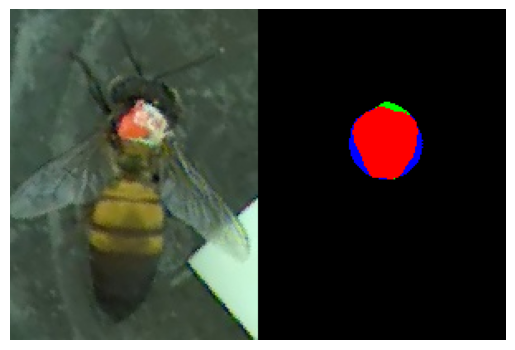

f06x2022_06_28.mp4.track000306.frame004886.jpg
Dice coefficient: 0.901628664495114


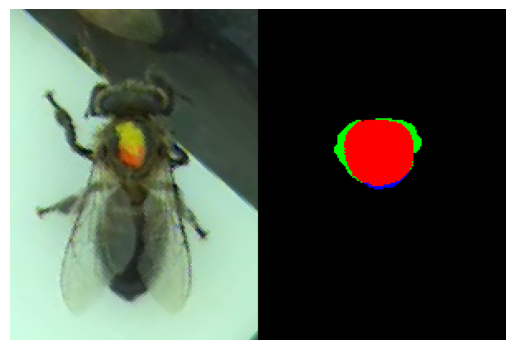

f06x2022_06_28.mp4.track000344.frame005720.jpg
Dice coefficient: 0.9136471385032171


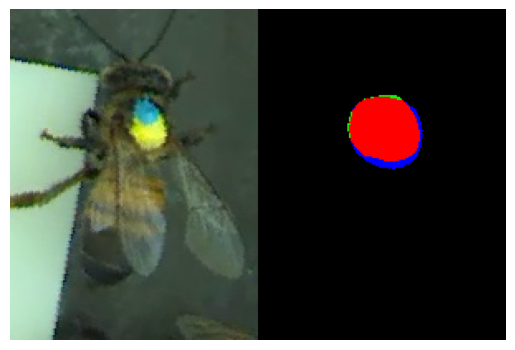

f06x2022_06_28.mp4.track000381.frame007837.jpg
Dice coefficient: 0.885902201887332


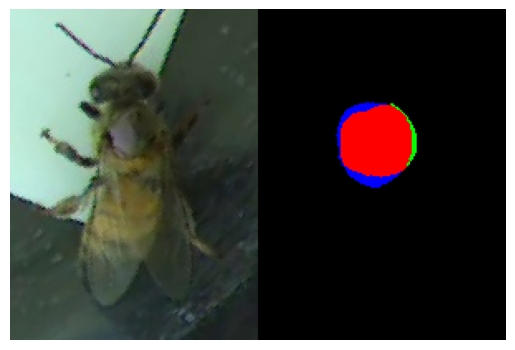

f06x2022_06_28.mp4.track000401.frame009363.jpg
Dice coefficient: 0.912639405204461


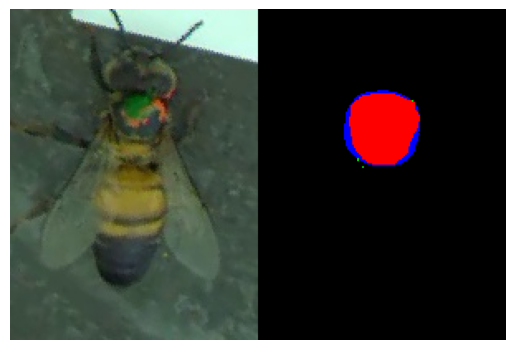

f06x2022_06_28.mp4.track000401.frame009373.jpg
Dice coefficient: 0.8866352770735241


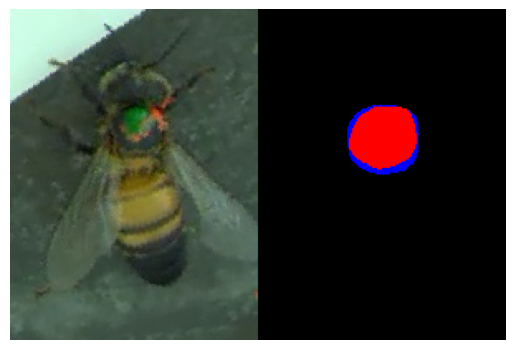

f06x2022_06_28.mp4.track000405.frame009773.jpg
Dice coefficient: 0.9437726723095526


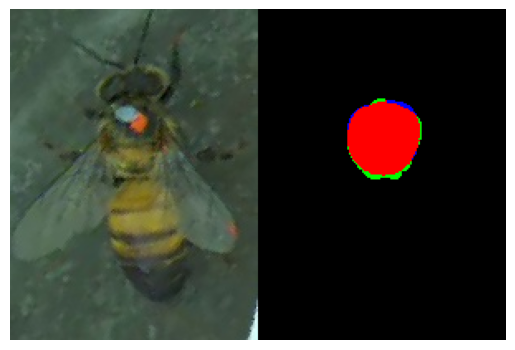

f08x2022_06_28.mp4.track000023.frame000404.jpg
Dice coefficient: 0.9048873280655546


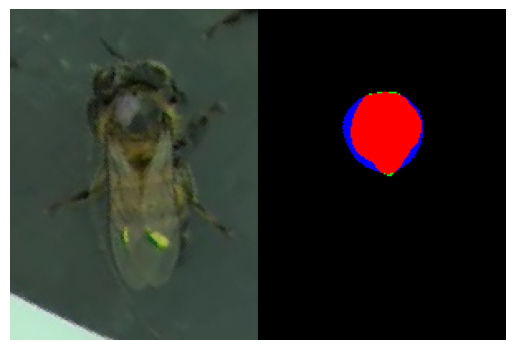

f08x2022_06_28.mp4.track000066.frame001176.jpg
Dice coefficient: 0.9109380291229259


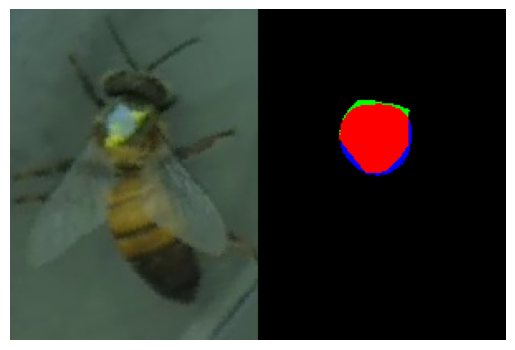

f08x2022_06_28.mp4.track000082.frame001515.jpg
Dice coefficient: 0.8676774638180565


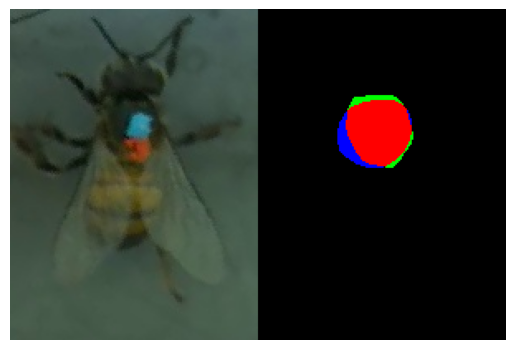

f08x2022_06_28.mp4.track000097.frame002154.jpg
Dice coefficient: 0.9379229185054427


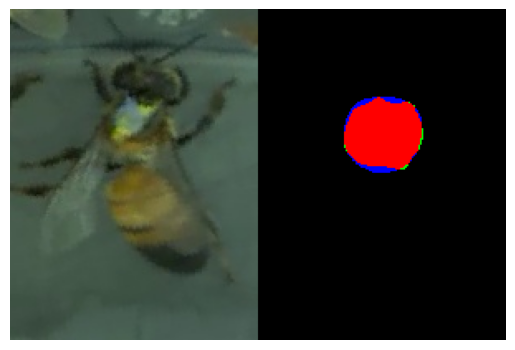

f09x2022_06_28.mp4.track000153.frame003162.jpg
Dice coefficient: 0.9448920399613278


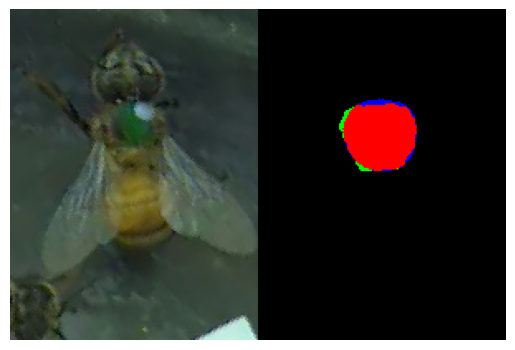

f09x2022_06_28.mp4.track000176.frame005081.jpg
Dice coefficient: 0.9016730261226886


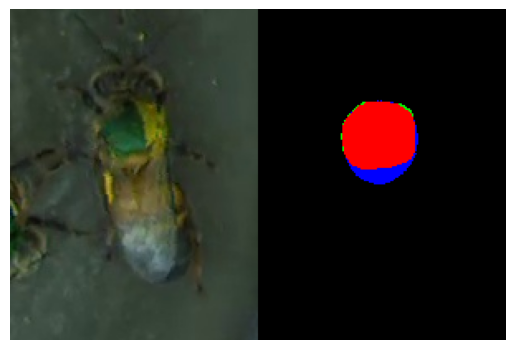

f09x2022_06_28.mp4.track000177.frame004381.jpg
Dice coefficient: 0.8776429809358752


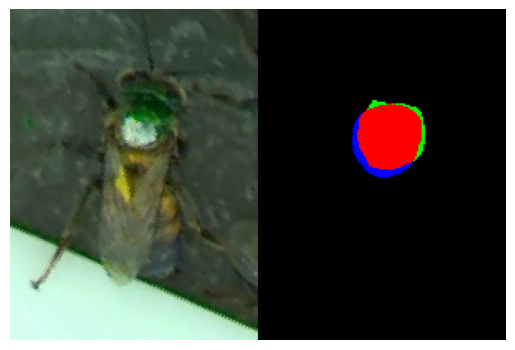

f09x2022_06_28.mp4.track000213.frame004190.jpg
Dice coefficient: 0.8269814502529511


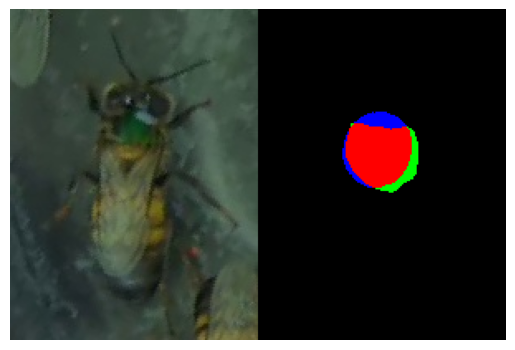

f09x2022_06_28.mp4.track000317.frame005743.jpg
Dice coefficient: 0.8468954878519089


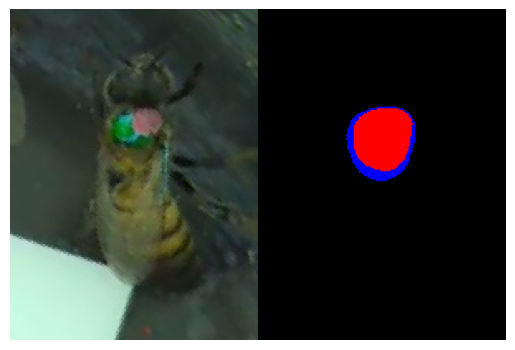

f09x2022_06_28.mp4.track000358.frame007107.jpg
Dice coefficient: 0.8839779005524862


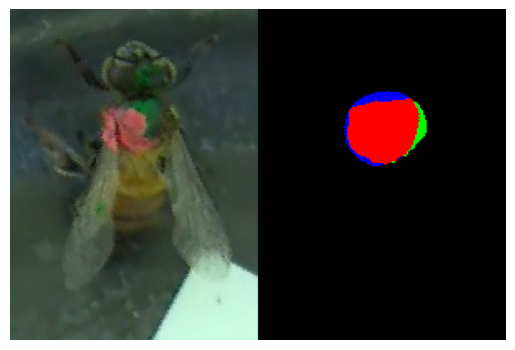

f09x2022_06_28.mp4.track000392.frame007378.jpg
Dice coefficient: 0.9287579261469601


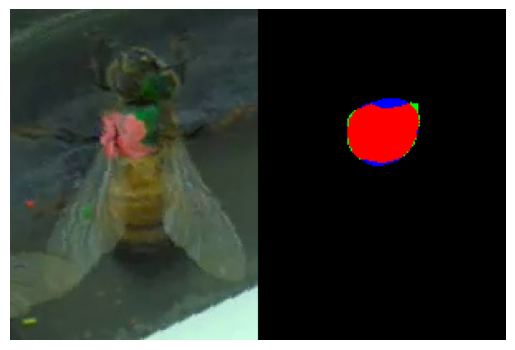

f1.1x2022_06_22.mp4.track000051.frame005260.jpg
Dice coefficient: 0.8353246753246754


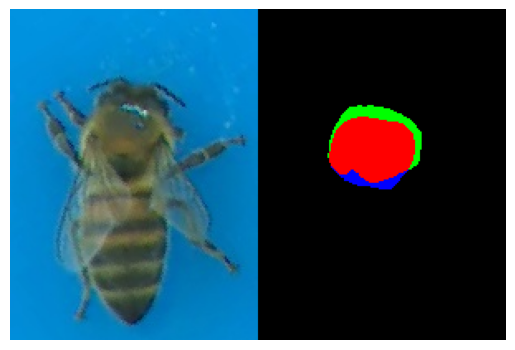

f1.2x2022_06_22.mp4.track000004.frame001173.jpg
Dice coefficient: 0.9050392504431501


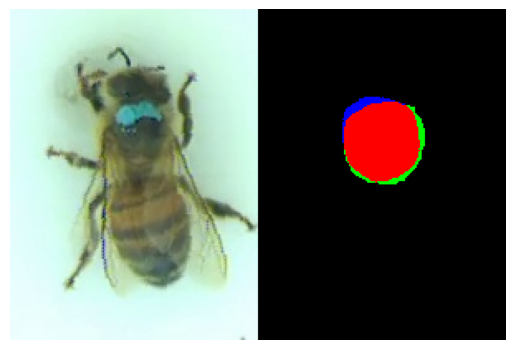

f10x2022_06_28.mp4.track000159.frame003861.jpg
Dice coefficient: 0.8757396449704142


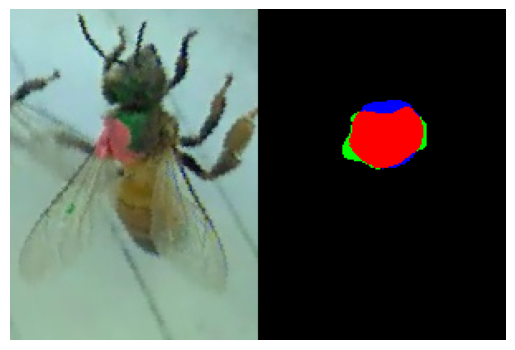

f10x2022_06_28.mp4.track000162.frame003997.jpg
Dice coefficient: 0.9385749385749386


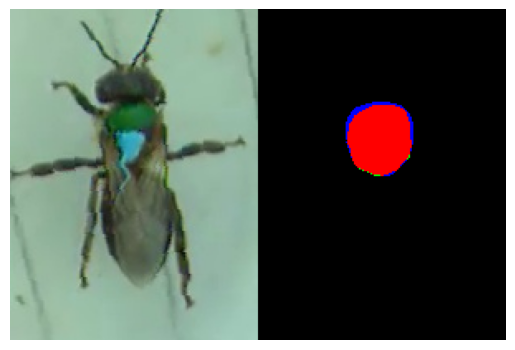

f10x2022_06_28.mp4.track000241.frame005264.jpg
Dice coefficient: 0.8996235884567126


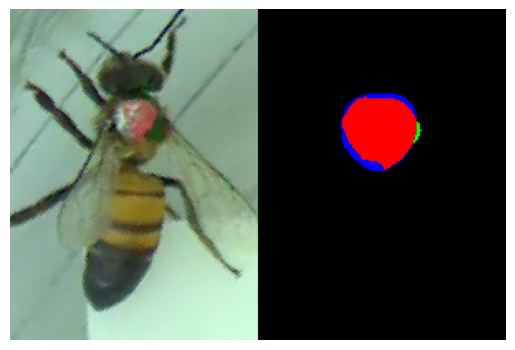

f13x2022_06_28.mp4.track000054.frame001458.jpg
Dice coefficient: 0.38982133188955065


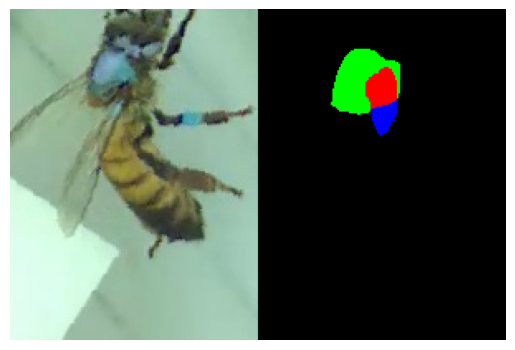

f13x2022_06_28.mp4.track000076.frame002641.jpg
Dice coefficient: 0.9215017064846417


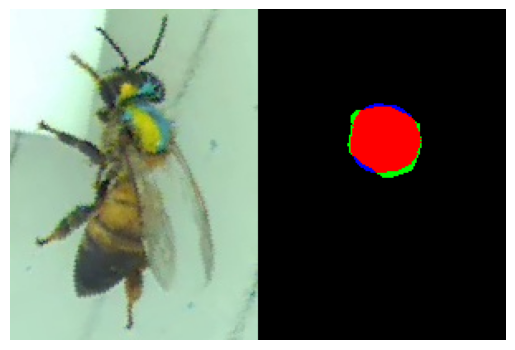

f13x2022_06_28.mp4.track000089.frame003021.jpg
Dice coefficient: 0.9181494661921709


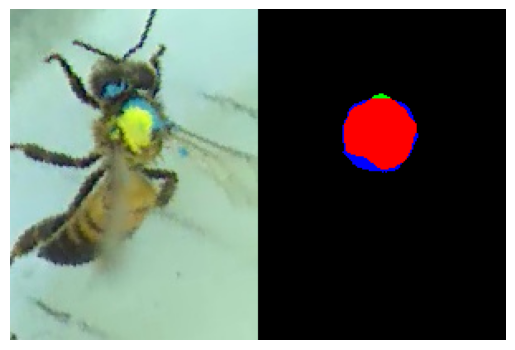

f13x2022_06_28.mp4.track000091.frame003218.jpg
Dice coefficient: 0.8925104022191401


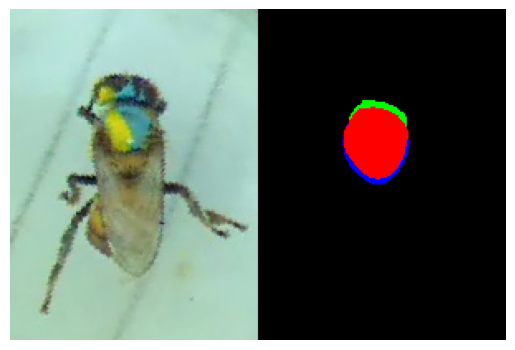

f13x2022_06_28.mp4.track000139.frame005261.jpg
Dice coefficient: 0.9229181004817619


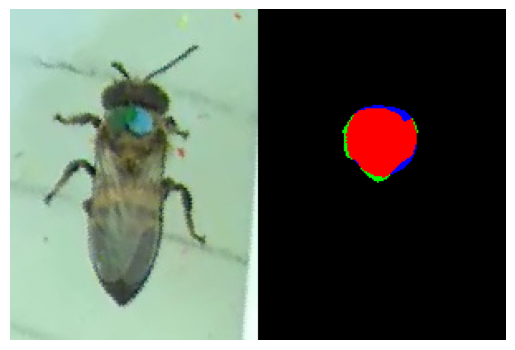

f13x2022_06_28.mp4.track000164.frame005619.jpg
Dice coefficient: 0.908433734939759


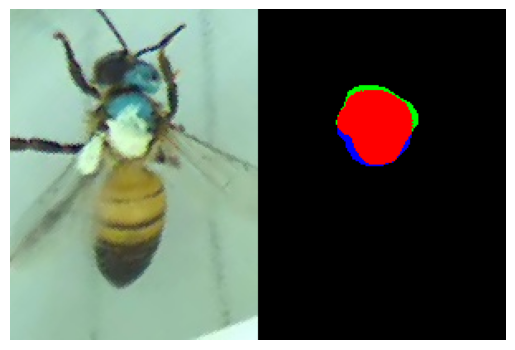

f15x2022_06_28.mp4.track000017.frame000574.jpg
Dice coefficient: 0.9018207782934666


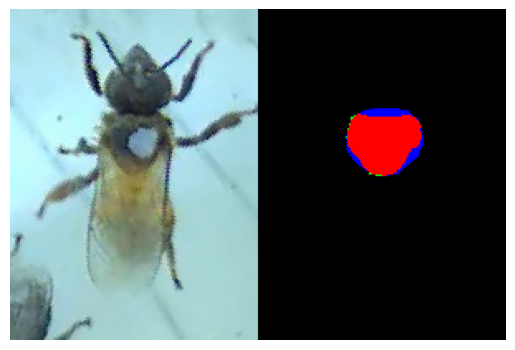

f15x2022_06_28.mp4.track000094.frame002076.jpg
Dice coefficient: 0.9130105900151286


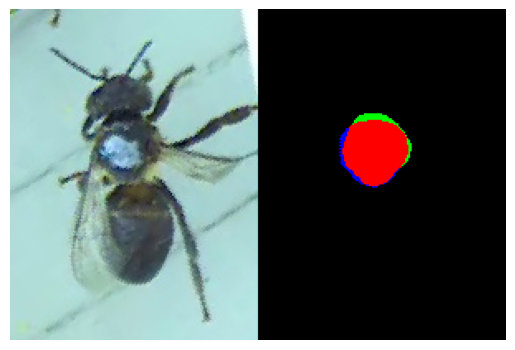

f15x2022_06_28.mp4.track000130.frame003418.jpg
Dice coefficient: 0.9445974900520355


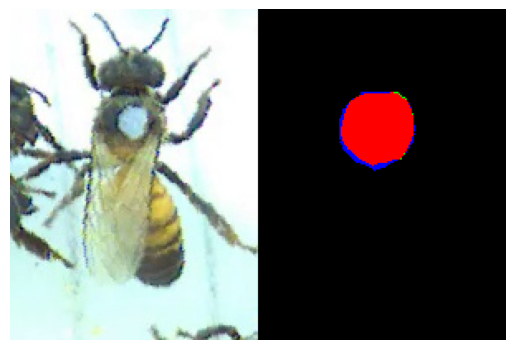

f15x2022_06_28.mp4.track000391.frame008134.jpg
Dice coefficient: 0.946974847042828


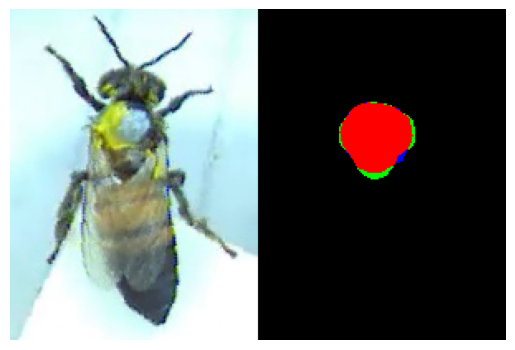

f17x2022_06_28.mp4.track000010.frame000706.jpg
Dice coefficient: 0.9445945945945946


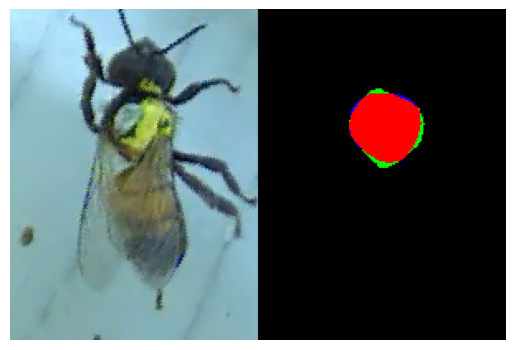

f17x2022_06_28.mp4.track000119.frame002489.jpg
Dice coefficient: 0.9034038638454461


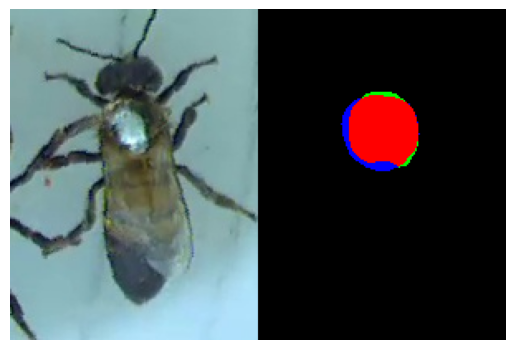

f17x2022_06_28.mp4.track000186.frame005217.jpg
Dice coefficient: 0.9190093708165997


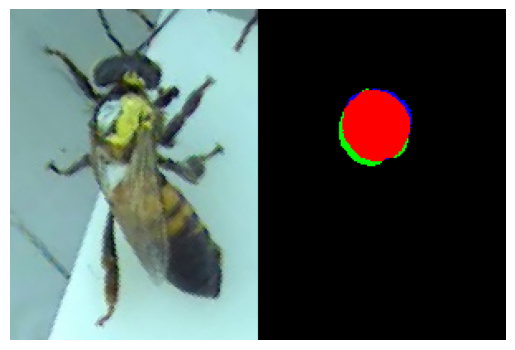

f17x2022_06_28.mp4.track000206.frame006589.jpg
Dice coefficient: 0.9406537607108855


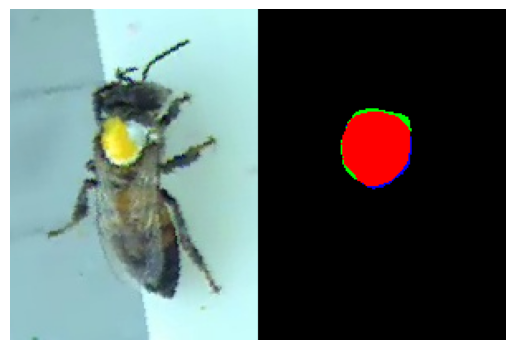

f17x2022_06_28.mp4.track000248.frame007250.jpg
Dice coefficient: 0.7321499013806706


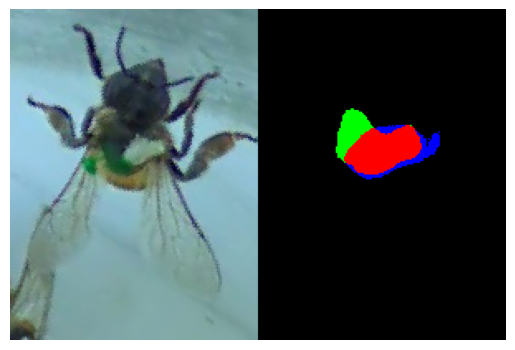

f19x2022_06_28.mp4.track000000.frame000041.jpg
Dice coefficient: 0.9321692411014103


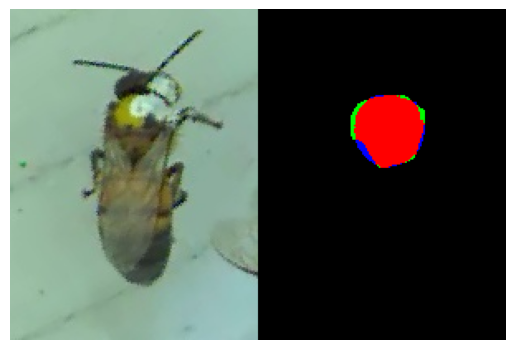

f19x2022_06_28.mp4.track000067.frame002560.jpg
Dice coefficient: 0.897803247373448


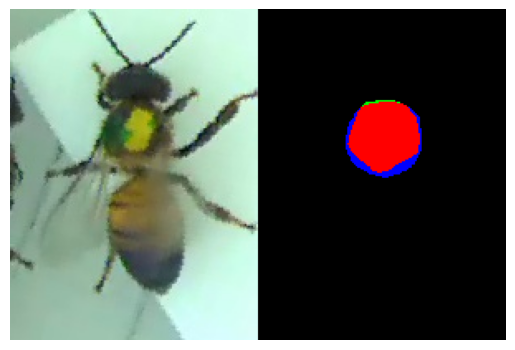

f19x2022_06_28.mp4.track000142.frame005399.jpg
Dice coefficient: 0.9041894353369763


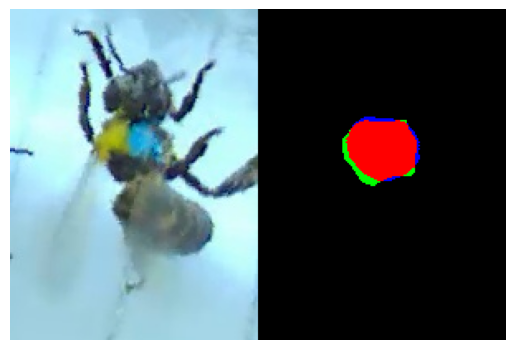

f21x2022_06_28.mp4.track000002.frame000011.jpg
Dice coefficient: 0.9100071994240461


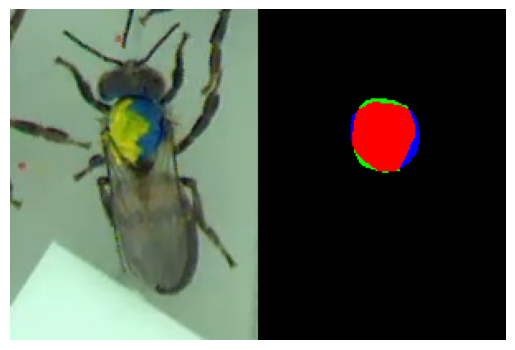

f21x2022_06_28.mp4.track000004.frame000197.jpg
Dice coefficient: 0.8779649364042627


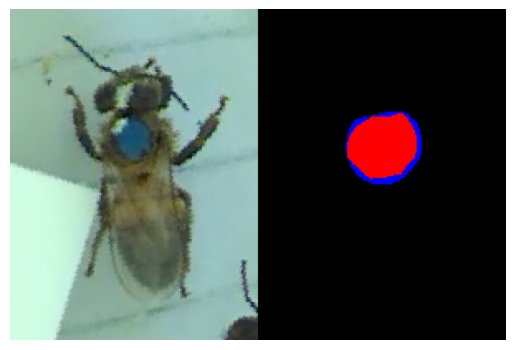

f21x2022_06_28.mp4.track000008.frame000398.jpg
Dice coefficient: 0.9100357258850276


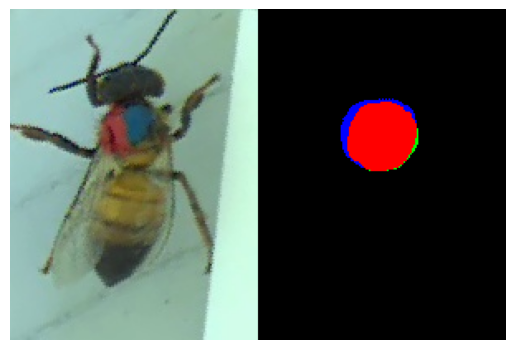

f21x2022_06_28.mp4.track000026.frame002984.jpg
Dice coefficient: 0.8891938250428817


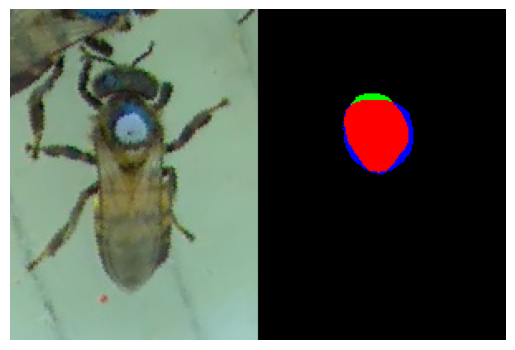

f21x2022_06_28.mp4.track000028.frame002113.jpg
Dice coefficient: 0.9443889443889444


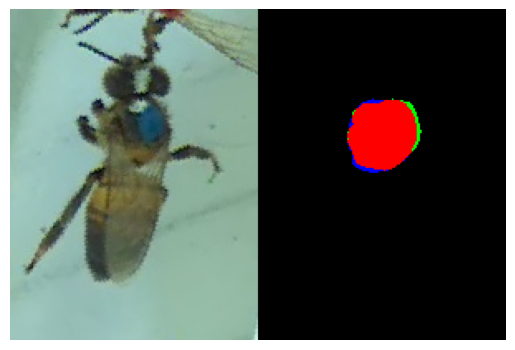

f22x2022_06_28.mp4.track000014.frame000541.jpg
Dice coefficient: 0.8642699926632429


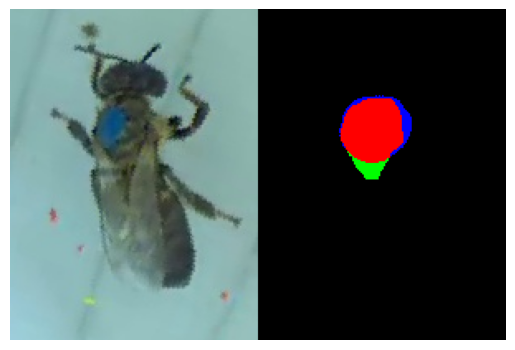

f22x2022_06_28.mp4.track000064.frame004998.jpg
Dice coefficient: 0.8648239303294206


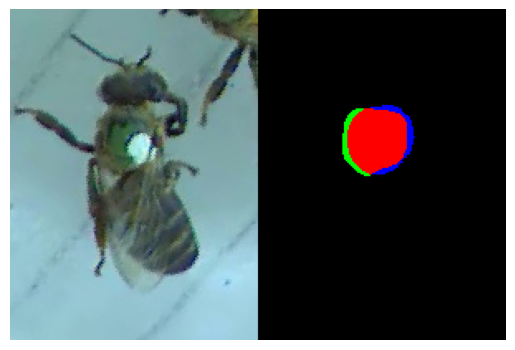

f2x2022_06_22.mp4.track000022.frame004129.jpg
Dice coefficient: 0.9361911800936191


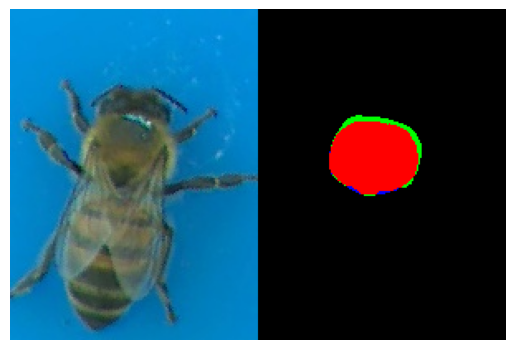

f2x2022_07_22.mp4.track000042.frame003450.jpg
Dice coefficient: 0.9635666347075743


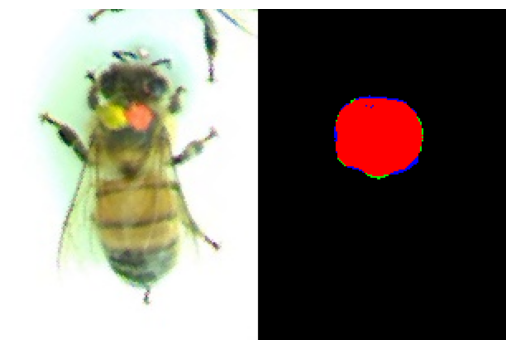

f3.1x2022_06_22.mp4.track000055.frame004944.jpg
Dice coefficient: 0.8957639219419324


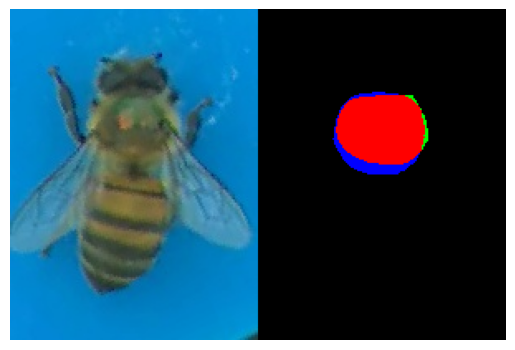

f3.1x2022_06_22.mp4.track000093.frame007395.jpg
Dice coefficient: 0.9431169380418694


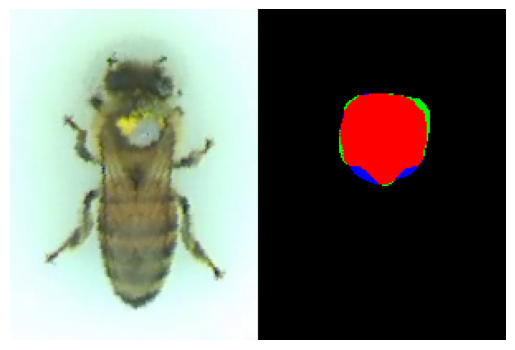

f3.2x2022_06_22.mp4.track000016.frame001551.jpg
Dice coefficient: 0.9343530911408541


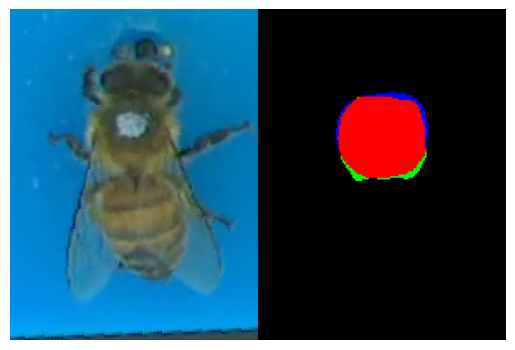

f3.2x2022_06_22.mp4.track000091.frame008154.jpg
Dice coefficient: 0.9578506285432585


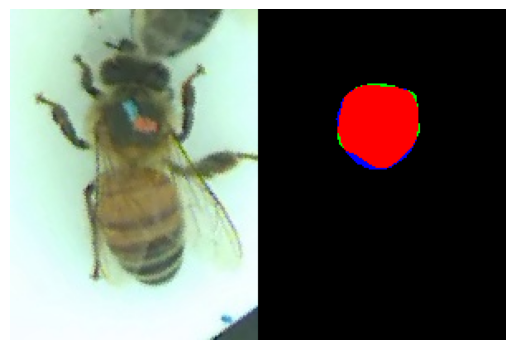

f3x2022_07_15.mp4.track000382.frame023662.jpg
Dice coefficient: 0.9160611375595089


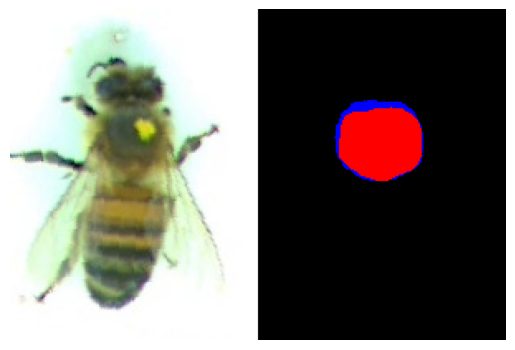

f3x2022_07_22.mp4.track000181.frame011176.jpg
Dice coefficient: 0.9433744221879815


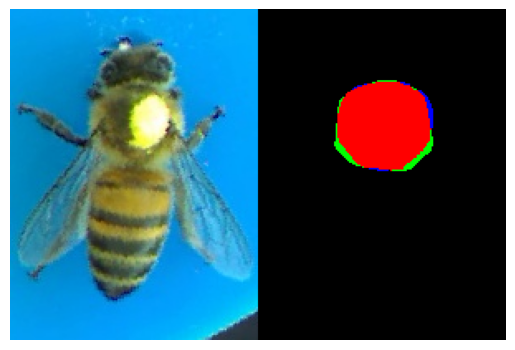

f4x2022_06_22.mp4.track000002.frame000900.jpg
Dice coefficient: 0.9513846153846154


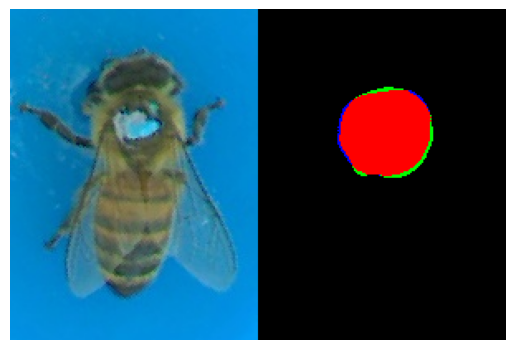

f5x2022_06_20.mp4.track000048.frame007552.jpg
Dice coefficient: 0.9268765133171912


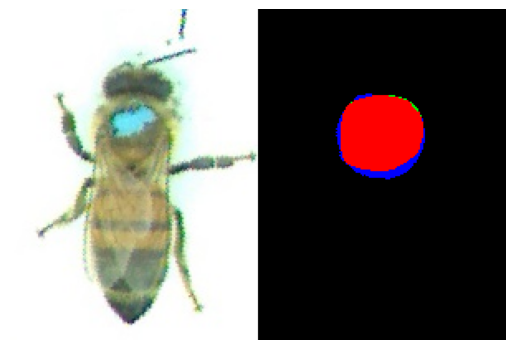

f5x2022_06_20.mp4.track000052.frame008426.jpg
Dice coefficient: 0.9132231404958677


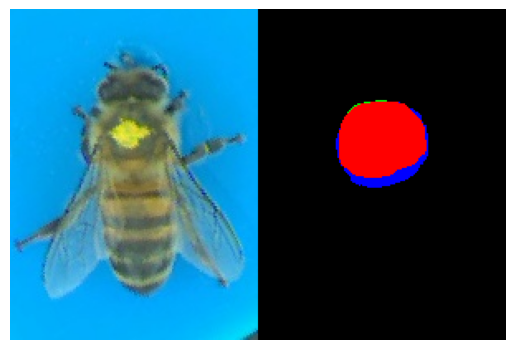

f6.2x2022_06_20.mp4.track000075.frame004534.jpg
Dice coefficient: 0.9255106127352823


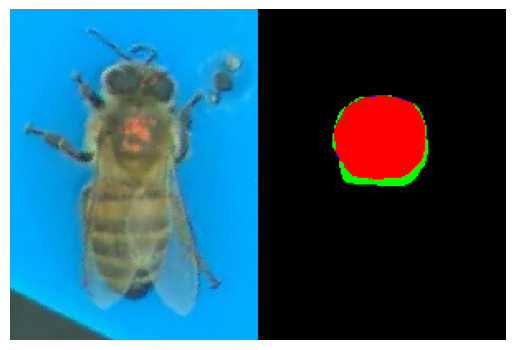

f6.2x2022_06_20.mp4.track000103.frame006098.jpg
Dice coefficient: 0.836241610738255


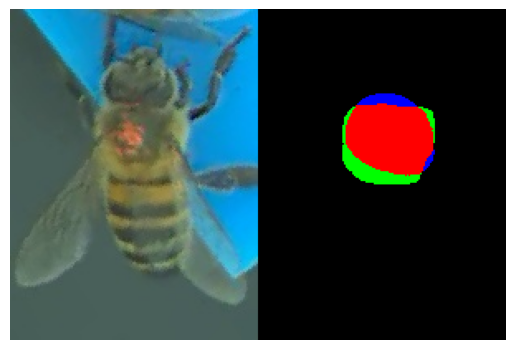

f6.3x2022_06_20.mp4.track000051.frame003132.jpg
Dice coefficient: 0.8116140832190215


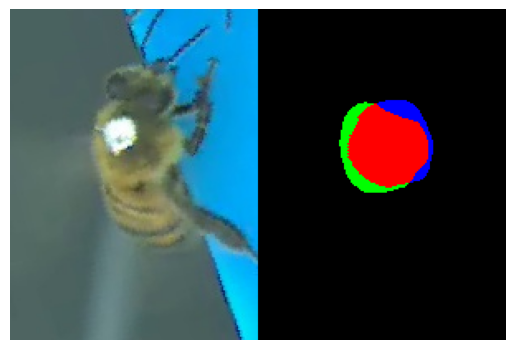

f6.3x2022_06_20.mp4.track000211.frame008645.jpg
Dice coefficient: 0.9351626466032308


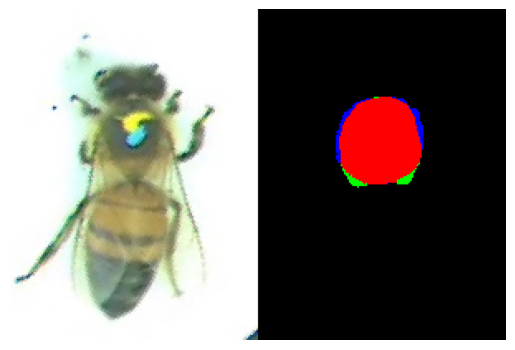

f6.3x2022_06_20.mp4.track000401.frame013679.jpg
Dice coefficient: 0.9416130628401781


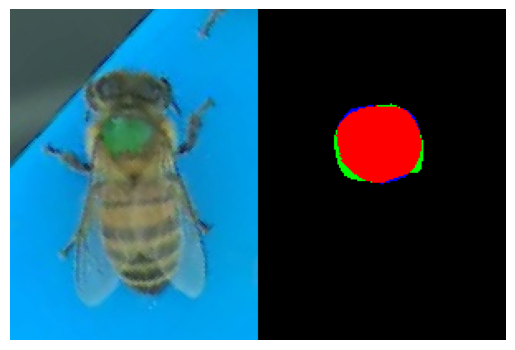

f7x2022_06_20.mp4.track000001.frame000321.jpg
Dice coefficient: 0.9263878698948398


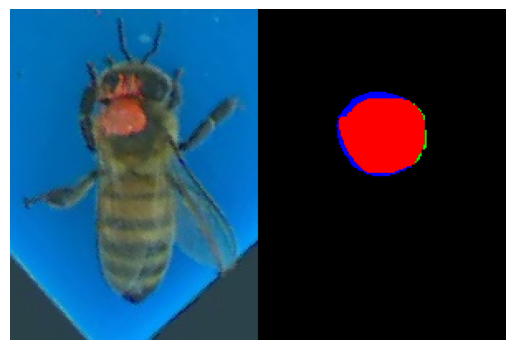

f7x2022_06_20.mp4.track000018.frame000241.jpg
Dice coefficient: 0.9190225203641591


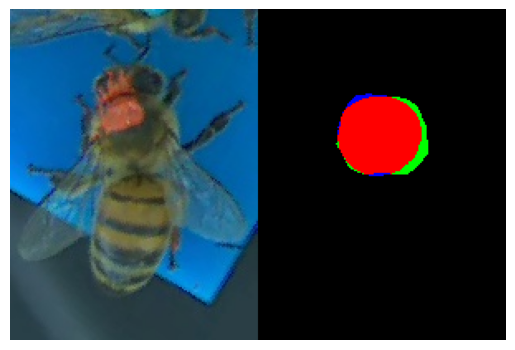

f7x2022_06_20.mp4.track000063.frame000967.jpg
Dice coefficient: 0.7268016957136129


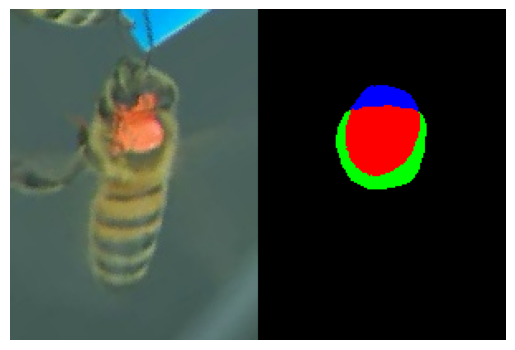

filesortf7x2022_06_20.mp4.track000051.frame000947.jpg
Dice coefficient: 0.9309576837416481


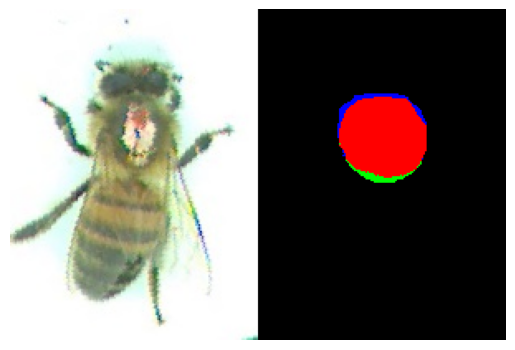

In [112]:
# code for viewing masks and images side by side 

import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def stitch_images(image_dir1, image_dir2):
    '''
    A function to show matching images frm two directories side by side. 
    When showing a RGB and a binary mask, enter binary mask dir second. 
    
    Parameters: 
    image_dir1(str): path to image dir \
    '''

    # Get the list of image filenames in both directories
    filenames1 = os.listdir(image_dir1)
    filenames2 = os.listdir(image_dir2)
    

    # Sort the filenames to ensure correct matching
    filenames1.sort()
    filenames2.sort()


    # Loop over the image pairs and stitch them
    for filename1, filename2 in zip(filenames1, filenames2):
        # Load the images
        image1 = Image.open(os.path.join(image_dir1, filename1))
        image2 = Image.open(os.path.join(image_dir2, filename2))
     
        if  np.array(image1).shape != np.array(image2).shape:
            arr = np.array(image2)
            arr_reshaped = np.expand_dims(arr, axis=-1)  # Add a new axis at the end
            arr_reshaped = np.tile(arr_reshaped, (1, 1, 3)) 
            if  np.array(image1).shape != np.array(arr_reshaped).shape:
                print('check input image dimensions, remember to put binary masks second')
                return
        # Stitch the images horizontally
            stitched_image = np.concatenate((image1, arr_reshaped), axis=1)
        else:
            stitched_image = np.concatenate((image1, image2), axis=1)
        
        
        # Display the stitched image
        print(filename1)

        # adding display of dice loss for presentation
        mask_true = "./data/thorax_only_masks/testing/"+filename2[:-20]+".png"
        mask_pred = "/home/lqmeyers/paintDetect/data/thorax_only_masks/predict_2023-05-26-01:21:49/"+filename2[:-20]+".pred.jpg"
        dice_coefficient = compute_dice_coefficient(mask_true, mask_pred)
        print("Dice coefficient:", dice_coefficient)

    
        plt.imshow(stitched_image)
        plt.axis('off')
        plt.show()

stitch_images("./data/images/testing/","/home/lqmeyers/paintDetect/data/thorax_only_masks/predict_2023-05-26-01:21:49/comparisons/")
#stitch_images("./images/testing/","./masks/predict_2023-05-25-12:02:04/comparisons/")
#stitch_images('./images/training/','./masks/training/')

### 6. Averaging mask pred vs true comparison images to visualize performance

Average all images 

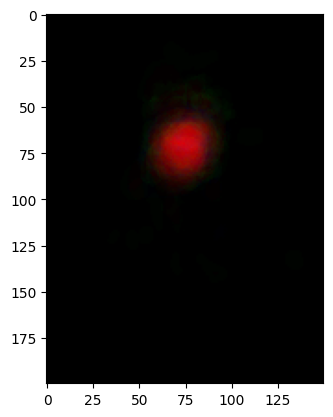

In [88]:
# Directory containing the images
image_dir = "./data/paint_only_masks/predict_2023-05-25-12:02:04/comparisons/"

# Get a list of image filenames
image_files = os.listdir(image_dir)

# Initialize variables for total and average image
total_image = None
count = 0

# Iterate over the image files
for image_file in image_files:
    # Load each image
    image_path = os.path.join(image_dir, image_file)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Add the image to the total
    if total_image is None:
        total_image = image.astype(float)
    else:
        total_image += image.astype(float)

    count += 1

# Compute the average image
average_image = (total_image / count).astype("uint8")


# Display the average image
plt.imshow(average_image)



Only average for each pixel that non zero

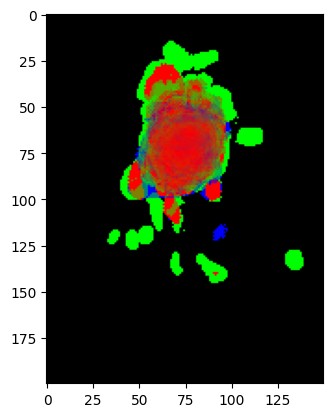

In [86]:
#Averaging all images together

import cv2
import os

# Directory containing the images
image_dir = "./data/paint_only_masks/predict_2023-05-25-12:02:04/comparisons/"
directory = image_dir

# Get a list of image file paths in the directory
image_files = [os.path.join(directory, filename) for filename in os.listdir(directory) if filename.endswith('.png')]

# Read the images
images = []
for image_file in image_files:
    image = cv2.imread(image_file, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    images.append(image)

# Get the image size
height, width, _ = images[0].shape

# Create an empty average image
average_image = np.zeros((height, width, 3), dtype=np.uint16)

# Iterate over each pixel
for y in range(height):
    for x in range(width):
        pixel_values = []
        for image in images:
            if np.any(image[y, x] != 0):
                pixel_values.append(image[y, x])
        if pixel_values:
            average_color = np.mean(pixel_values, axis=0)
            average_image[y, x] = average_color

# Convert the average image to uint8
average_image = average_image.astype(np.uint8)

# Display the average image
plt.imshow(average_image)

